# Comparing Air Quality and Public Health across US Cities

To start, we will be conducting some pre-processing steps. While we have access to data prior to 1980, according to the EPA, 1980 marks a time that there was consistent procedure in measuring ozone levels. For now, we will begin looking at data from 2000 for consistent measurement procedures. If necessary, we will re-introduce data from 1980 - 2000. 

FROM THE EPA: 
1980 marked a revision to the ozone monitoring program (44 FR 8202) that included implementation of revised monitor calibration procedures. Data from prior years is available but the user should understand that total uncertainty and spatial variability as artefacts of the measurements are higher than in later years. 1980 marks the beginning of nationally consistent operational and quality assurance procedures.

1999 marked the beginning of required PM2.5 (particulate matter of 2.5 microns in aerodynamic diameter or less) and PM2.5 speciated monitoring (62 FR 38652). PM10 and TSP data is available in prior years, but 1999 is the first year with national FRM and non-FRM PM2.5 monitoring. This is reflected in the large jump in the number of monitors in 1999.


In [1]:
pip install --upgrade geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
#imports
import pandas as pd
import altair as alt
import seaborn as sns
import zipfile
import geopandas 
import geodatasets 
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/krithikanatarajan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
states = geopandas.read_file('ne_110m_admin_1_states_provinces')
counties = geopandas.read_file('counties data')
county = geopandas.read_file('fips-by-state.csv')
county.head()
state_codes = geopandas.read_file('state codes')

state_codes.head()

,stname,st,stusps,geometry
0,Alabama,01,AL,None
1,Alaska,02,AK,None
2,Arizona,04,AZ,None
3,Arkansas,05,AR,None
4,California,06,CA,None


In [4]:
# get the state code in numeric form for counties
counties['state_code'] = counties['ISO_3166_2'].str.split('-').str[1]

# Ensure the state code in state_codes is a string
state_codes['st'] = state_codes['st'].astype(str)

counties['state_code'] = counties['state_code'].str.strip()
state_codes['st'] = state_codes['st'].str.strip()

# merge datasets
counties_with_state = counties.merge(state_codes, left_on='state_code', right_on='st', how='left')
counties_with_state.head()

,FEATURECLA,SCALERANK,ADM2_CODE,ISO_3166_2,ISO_A2,ADM0_SR,NAME,NAME_ALT,NAME_LOCAL,TYPE,...,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,geometry_x,state_code,stname,st,stusps,geometry_y
0,Admin-2 scale rank,0,USA-53073,US-53,US,1,Whatcom,Whatcom County,None,County,...,واٹکم کاؤنٹی، واشنگٹن,Whatcom,霍特科姆县,霍特科姆縣,"MULTIPOLYGON (((-122.75302 48.99251, -122.6532...",53,Washington,53,WA,None
1,Admin-2 scale rank,0,USA-53047,US-53,US,1,Okanogan,Okanogan County,None,County,...,اوکاناگن کاؤنٹی، واشنگٹن,Okanogan,奥卡诺根县,奧卡諾根縣,"POLYGON ((-120.85196 48.99251, -120.67495 48.9...",53,Washington,53,WA,None
2,Admin-2 scale rank,0,USA-53019,US-53,US,1,Ferry,Ferry County,None,County,...,فیری کاؤنٹی، واشنگٹن,Ferry,费里县,費里縣,"POLYGON ((-118.83688 48.99251, -118.69668 48.9...",53,Washington,53,WA,None
3,Admin-2 scale rank,0,USA-53065,US-53,US,1,Stevens,Stevens County,None,County,...,سٹیونس کاؤنٹی، واشنگٹن,Stevens,史蒂文斯县,史蒂文斯縣,"POLYGON ((-118.21996 48.99251, -118.03723 48.9...",53,Washington,53,WA,None
4,Admin-2 scale rank,0,USA-53051,US-53,US,1,Pend Oreille,Pend Oreille County,None,County,...,پینڈ اورائل کاؤنٹی، واشنگٹن,Pend Oreille,庞多雷县,龐多雷縣,"POLYGON ((-117.42951 48.99251, -117.37787 48.9...",53,Washington,53,WA,None


##  Visualization/Exploration Planning (AQI by County for 2023)

### What Data is Show? (Data Abstraction)
This is a dataframe containing information about criteria pollutants annually by County. The criteria test are CO (Carbon Monoxide), NO2 (Nitrogen Dioxide), Ozone, PM2.5 (Fine Particulate Matter with Diameter less than or equal to 2.5 microns), and PM10 (Fine Particulate Matter with Diameter less than or equal to 10 microns)

### Why is the user analyzing/viewing it? (Task Abstraction)
#### Task:
#### Action: 

### How is the data presented? (Visual Encodings)


In [5]:
aqi_county_2023 = pd.read_csv("annual_aqi_by_county_2023.csv")

In [6]:
aqi_county_2023.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2023,170,143,27,0,0,0,0,90,54,40,0,0,84,86,0
1,Alabama,Clay,2023,155,109,46,0,0,0,0,83,61,40,0,0,0,155,0
2,Alabama,DeKalb,2023,212,155,55,2,0,0,0,133,63,43,0,0,141,71,0
3,Alabama,Elmore,2023,118,102,16,0,0,0,0,90,54,40,0,0,118,0,0
4,Alabama,Etowah,2023,181,126,55,0,0,0,0,100,64,43,0,0,74,107,0


In [7]:
aqi_county_2023.shape

(949, 18)

## Visualization 1 (Exploratory)
**Task**: Discover trends of distribution for each criteria pollutant

**Action**: Display distribution of each criteria pollutant

**What**:
**How**:
**Why**:

In [8]:
aqi_county_2023.describe()

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
count,949.0,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,2023.0,194.891465,146.892518,43.481560,3.541623,0.832455,0.092729,0.050580,136.228662,64.929399,39.518440,0.788198,2.926238,114.210748,70.404636,6.561644
std,0.0,51.563261,44.509908,30.623047,5.153100,1.569205,0.334134,1.034006,78.274006,23.441782,9.752471,6.732097,13.412824,74.522416,67.777050,28.165380
min,2023.0,29.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,10.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023.0,179.000000,119.000000,21.000000,0.000000,0.000000,0.000000,0.000000,97.000000,54.000000,38.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,2023.0,182.000000,150.000000,37.000000,2.000000,0.000000,0.000000,0.000000,126.000000,64.000000,42.000000,0.000000,0.000000,121.000000,61.000000,0.000000
75%,2023.0,241.000000,173.000000,59.000000,5.000000,1.000000,0.000000,0.000000,164.000000,74.000000,45.000000,0.000000,0.000000,170.000000,111.000000,0.000000
max,2023.0,274.000000,271.000000,153.000000,51.000000,19.000000,3.000000,31.000000,1695.000000,542.000000,74.000000,93.000000,181.000000,273.000000,273.000000,269.000000


In [9]:
criteria_pollutant_days = ['Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10']
for col in criteria_pollutant_days:
    chart_days_co = alt.Chart(aqi_county_2023).mark_boxplot().encode(
        x=alt.X(col, title='Frequency'),
    )

    chart_days_co.display()


alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

In [10]:
# merge county geographical data to 2023 air quality data

counties_with_state['NAME'] = counties_with_state['NAME'].str.strip().str.lower()
counties_with_state['stname'] = counties_with_state['stname'].str.strip().str.lower()
aqi_county_2023['County'] = aqi_county_2023['County'].str.strip().str.lower()
aqi_county_2023['State'] = aqi_county_2023['State'].str.strip().str.lower()


full = pd.merge(counties_with_state, aqi_county_2023, left_on=['NAME', 'stname'], right_on=['County', 'State'], how='right')
full.columns

Index(['FEATURECLA', 'SCALERANK', 'ADM2_CODE', 'ISO_3166_2', 'ISO_A2',
       'ADM0_SR', 'NAME', 'NAME_ALT', 'NAME_LOCAL', 'TYPE', 'TYPE_EN',
       'CODE_LOCAL', 'REGION', 'REGION_COD', 'ABBREV', 'AREA_SQKM',
       'SAMEASCITY', 'LABELRANK', 'NAME_LEN', 'MAPCOLOR9', 'MAPCOLOR13',
       'FIPS', 'SOV_A3', 'ADM0_A3', 'ADM0_LABEL', 'ADMIN', 'GEONUNIT', 'GU_A3',
       'MIN_LABEL', 'MAX_LABEL', 'MIN_ZOOM', 'WIKIDATAID', 'NE_ID', 'latitude',
       'longitude', 'NAME_AR', 'NAME_BN', 'NAME_DE', 'NAME_EL', 'NAME_EN',
       'NAME_ES', 'NAME_FA', 'NAME_FR', 'NAME_HE', 'NAME_HI', 'NAME_HU',
       'NAME_ID', 'NAME_IT', 'NAME_JA', 'NAME_KO', 'NAME_NL', 'NAME_PL',
       'NAME_PT', 'NAME_RU', 'NAME_SV', 'NAME_TR', 'NAME_UK', 'NAME_UR',
       'NAME_VI', 'NAME_ZH', 'NAME_ZHT', 'geometry_x', 'state_code', 'stname',
       'st', 'stusps', 'geometry_y', 'State', 'County', 'Year',
       'Days with AQI', 'Good Days', 'Moderate Days',
       'Unhealthy for Sensitive Groups Days', 'Unhealthy Days',
  

/Users/krithikanatarajan/opt/anaconda3/lib/python3.9/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)


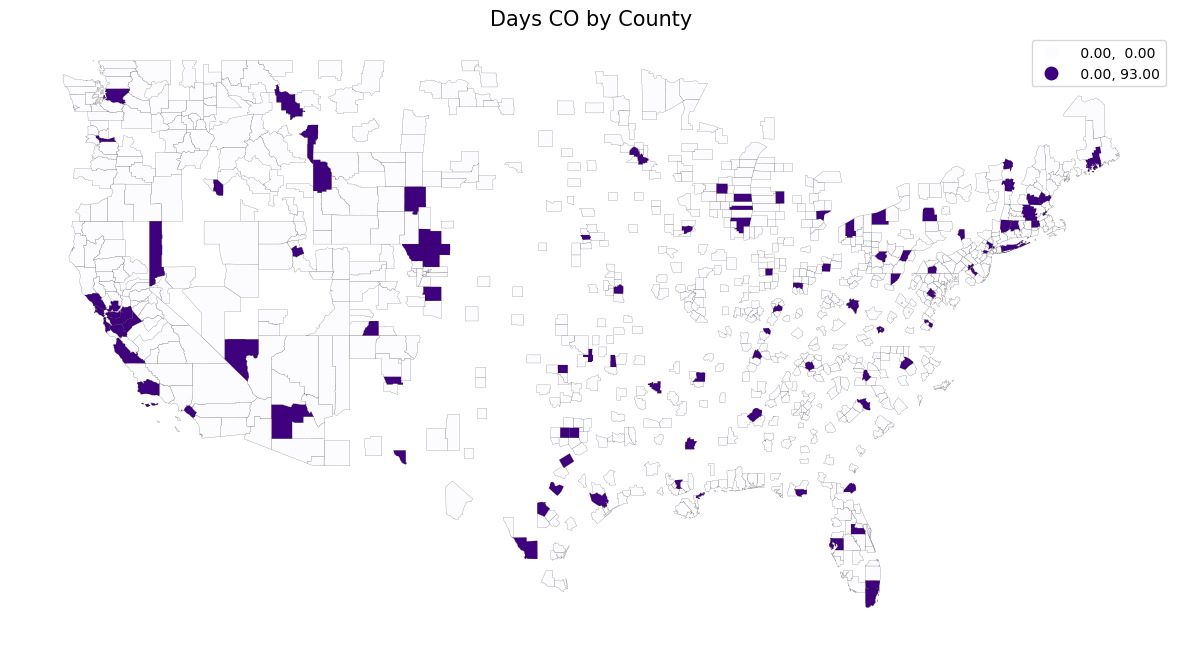

/Users/krithikanatarajan/opt/anaconda3/lib/python3.9/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)


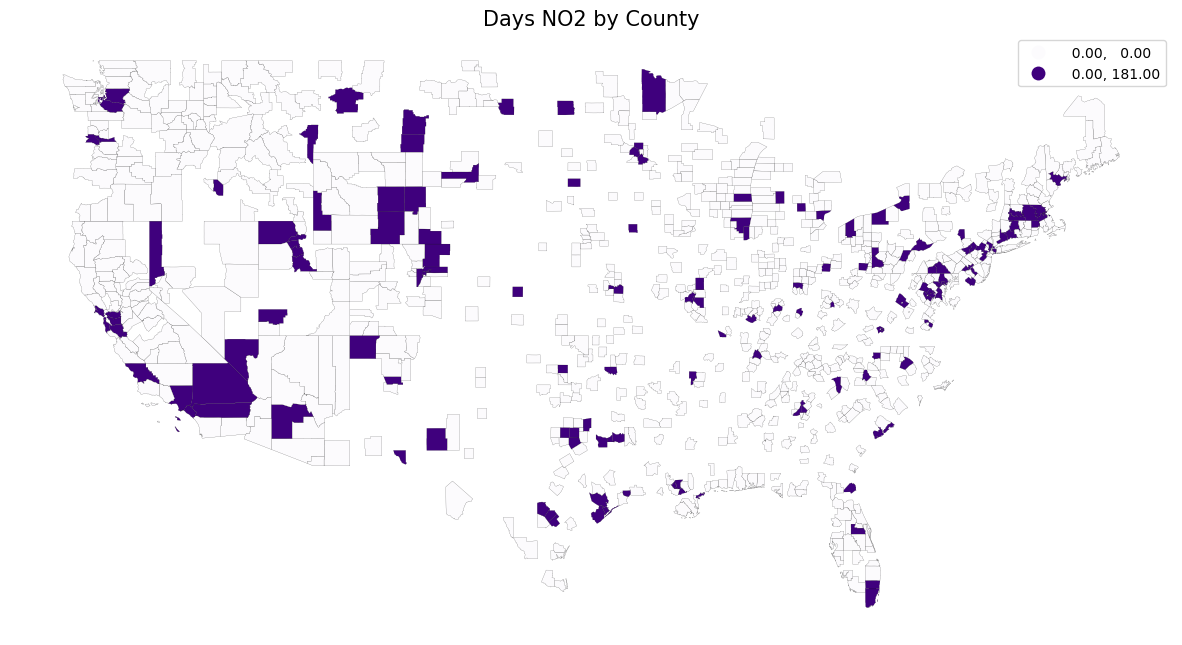

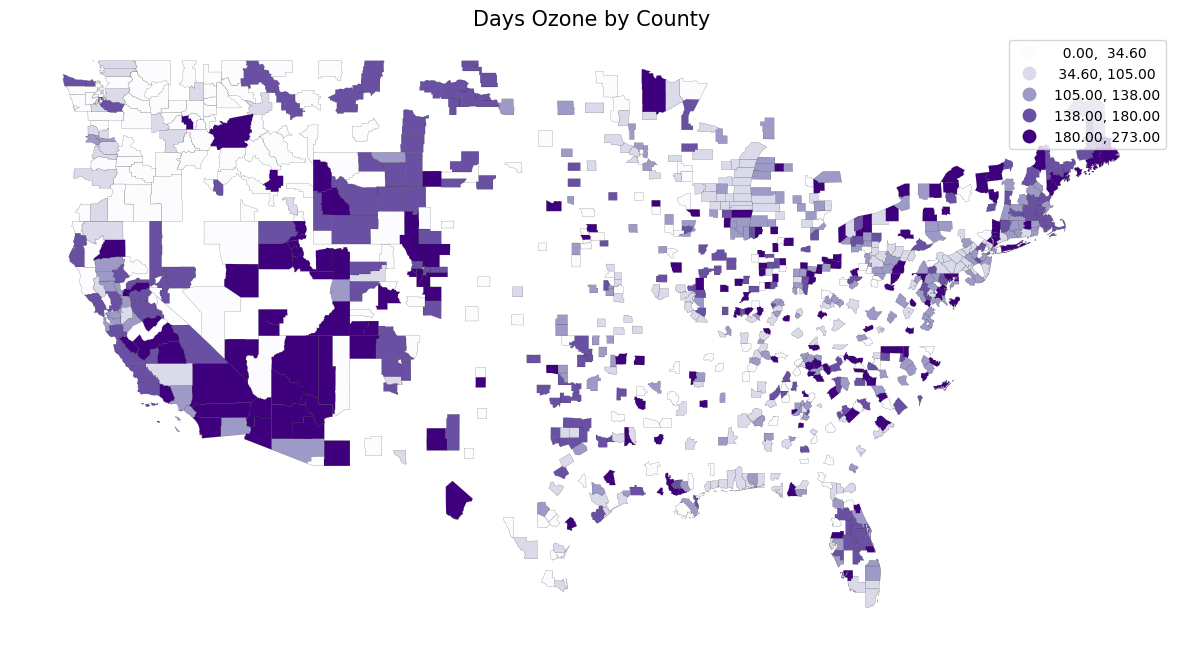

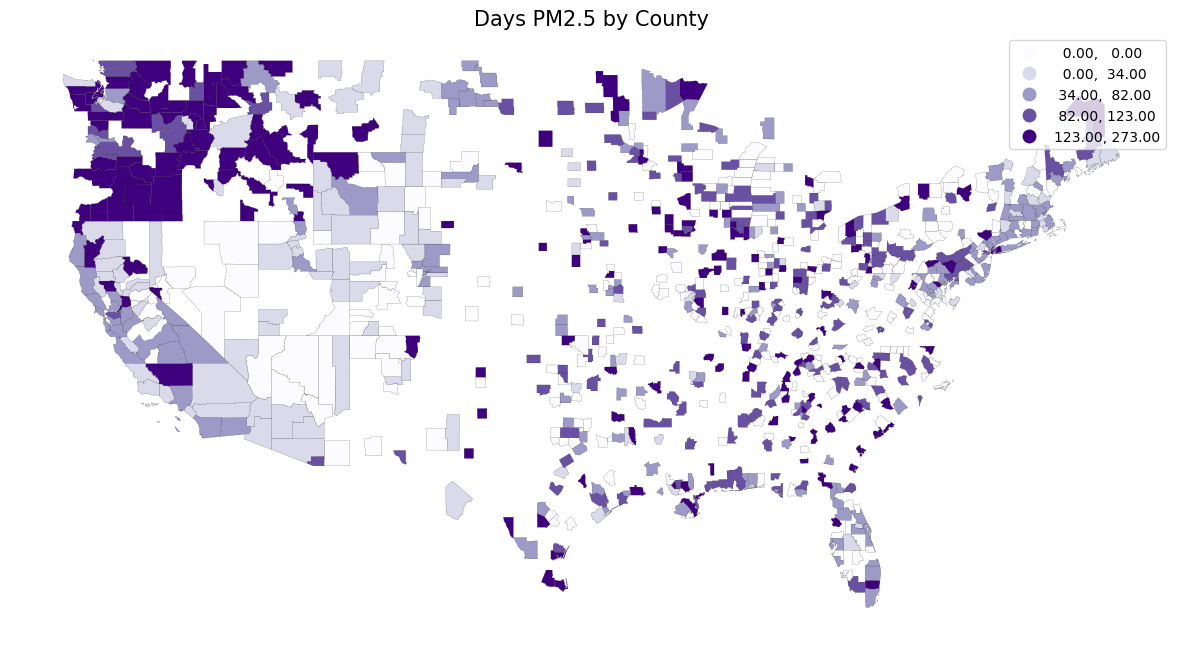

/Users/krithikanatarajan/opt/anaconda3/lib/python3.9/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)


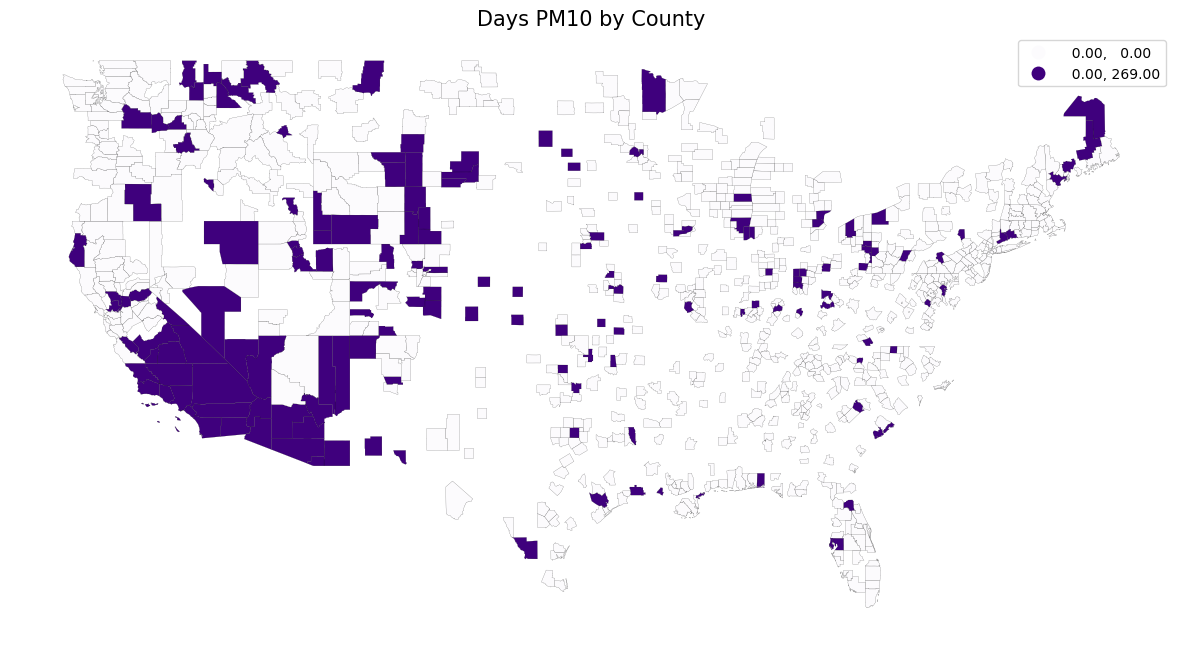

In [11]:
# create heat map for every criteria pollutant for the lower 48 states
counties_df_continental = full[(full['State'].str.lower() != 'alaska') & (full['State'].str.lower() != 'hawaii')
                              & (full['State'].str.lower() != 'puerto rico') & (full['State'].str.lower() != 'virgin islands')]
criteria_pollutant_days = ['Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10']
counties_df_continental = counties_df_continental.set_geometry('geometry_x')
for col in criteria_pollutant_days:
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    counties_df_continental.plot(column=col, ax=ax,
              cmap='Purples',
             scheme='quantiles',                  
             edgecolor='black',
             linewidth=0.1,  # Thin lines for county borders
             missing_kwds={'color': 'lightgrey',  # Color for missing data
                                               'edgecolor': 'red',   # Edge color for missing data
                                               'hatch': '///',      # Hatch for missing data
                                               'label': 'Missing data'},
             legend = True)
    plt.title(f"{col} by County", fontsize=15)
   
    # Remove axis
    ax.set_axis_off()

    # Show the plot
    plt.show()

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
criteria_pollutant_days = ['Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10']
for col in criteria_pollutant_days:
    gdf.plot(column='col, ax=ax, legend=True,
         legend_kwds={'label': f"{col} By County",
                      'orientation': "horizontal"},
         cmap='Purples', edgecolor='black', linewidth=0.1) 

SyntaxError: EOL while scanning string literal (2960439840.py, line 4)

# Data Exploration for CDC 2023

In [ ]:
"""
# Specify the path to your zip file
zip_file_path = 'cdc_2023.csv.zip'

# Specify the file name within the zip file you wish to open
file_name_within_zip = 'cdc_2023.csv'

# Use the zipfile module to open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as z:
    # Extract the specified file from the zip file
    with z.open(file_name_within_zip) as f:
        # Read the extracted file into a pandas DataFrame
        cdc_2023 = pd.read_csv(f)
"""
# Now you can work with the DataFrame as usual
cdc_2023 = pd.read_csv('cdc_2023.csv')
cdc_2023.head()

## Data Pre-Processing


In [ ]:
# Removing Null Values and Error Values from Year 
cdc_2023 = cdc_2023[cdc_2023['Year'].astype(str).str.strip().str.match(r'^20\d{2}$')]
cdc_2023['Year'] = cdc_2023['Year'].astype(int)

In [ ]:
# Relavent Diseases: Heart Attack, Stroke, Lung Cancer, chronic bronchitis, emphysema, scarred lung tissue
cdc_2023['Measure'].unique()

In [ ]:
cdc_2023 = cdc_2023.dropna(subset=['Short_Question_Text'])

In [ ]:
# Checking for any more null values
cdc_2023.isnull().sum()